In [1]:
from plotting.utils import *
import matplotlib.pyplot as plt

In [2]:
dset = read_dataset()

Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable
Found latitude/longitude values, assuming latitude_longitude for projection grid_mapping variable


In [8]:
xr.open_dataset('/tmp/icon-eps/merged_ens1.nc', decode_times=False)

<xarray.Dataset>
Dimensions:    (cell: 75948, height: 1, height_2: 1, lev: 1, nv: 3, time: 20)
Coordinates:
  * time       (time) float64 360.0 720.0 1.08e+03 ... 6.48e+03 6.84e+03 7.2e+03
    clon       (cell) float64 ...
    clat       (cell) float64 ...
  * lev        (lev) float64 0.0
  * height     (height) float64 2.0
  * height_2   (height_2) float64 10.0
Dimensions without coordinates: cell, nv
Data variables:
    clon_bnds  (cell, nv) float64 ...
    clat_bnds  (cell, nv) float64 ...
    CAPE_ML    (time, lev, cell) float32 ...
    CLCT       (time, cell) float32 ...
    SNOW_CON   (time, cell) float32 ...
    SNOW_GSP   (time, cell) float32 ...
    2t         (time, height, cell) float32 ...
    tp         (time, cell) float32 ...
    VMAX_10M   (time, height_2, cell) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 1.9.8 (https://mpime...
    Conventions:          CF-1.6
    history:              Fri Feb 19 11:05:28 2021: cdo merge ens1_cape_ml_20...
    number_of_grid_used:  28
    grid_file_uri:        http://icon-downloads.mpimet.mpg.de/grids/public/ic...
    uuidOfHGrid:          982dcc6e-fe2e-11e4-9128-0b03674e713a
    institution:          Deutscher Wetterdienst
    CDO:                  Climate Data Operators version 1.9.8 (https://mpime...

In [19]:
dset['snow'] = dset['SNOW_CON'] + dset['SNOW_GSP']

In [29]:
snow_acc = dset['SNOW_GSP'] + dset['SNOW_CON']
snow = snow_acc.differentiate(coord="time", datetime_unit="h")
#snow = xr.DataArray(snow, name='snow_rate')

In [40]:
ds = ((snow > 0.5).sum(dim='realization') / 40)*100
ds['run'] = dset['run']

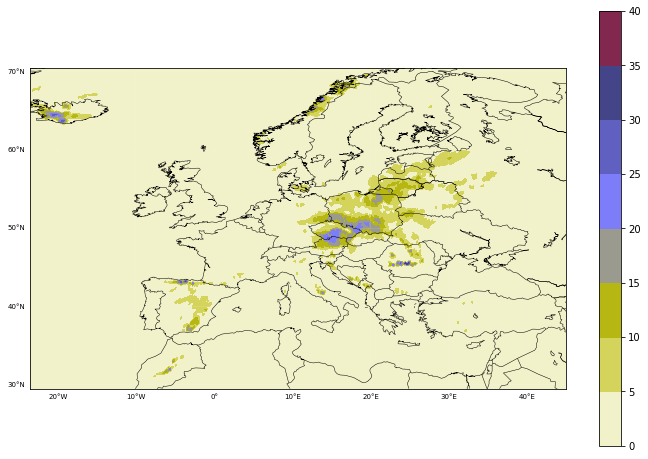

In [41]:
_ = plt.figure(figsize=(12, 8))

ax = plt.gca()

cmap = plt.get_cmap('gist_stern_r')
new_cmap = truncate_colormap(cmap, 0, 0.9)

m, x, y = get_projection(dset, 'euratl', labels=True)

cs = ax.tricontourf(x, y, ds[-1], cmap=new_cmap)

plt.colorbar(cs)